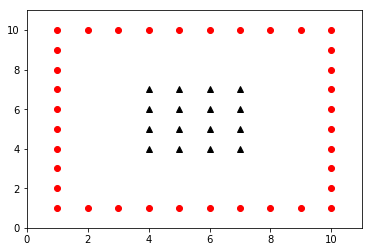

In [1]:
# Runs kernel perceptron on a 2-d data set and displays the results
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
# Load in a 2-d data set. Labels are +1/-1 and each line is a single
# data point, of the form: x1 x2 y
datafile = 'data1.txt'
data = np.loadtxt(datafile)
n,p = data.shape
x = data[:,0:2]
y = data[:,2]
# Now display the data for good measure
xmin = min(x[:,0]) - 1
xmax = max(x[:,0]) + 1
ymin = min(x[:,1]) - 1
ymax = max(x[:,1]) + 1
plt.plot(x[(y==1),0], x[(y==1),1], 'ro')
plt.plot(x[(y==-1),0], x[(y==-1),1], 'k^')
plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)
plt.show()

In [2]:
# Quadratic kernel function
def quadk(x,z):
    tmp = 1.0 + np.dot(x,z)
    return tmp*tmp
# Evaluate a classifier (alpha,x,y) on a new point x0
def evaluate(alpha,x,y,x0):
    value = 0.0
    for i in range(len(alpha)):
        if alpha[i] > 0:
            value = value + alpha[i] * y[i] * quadk(x[i,:],x0)
    return np.sign(value)
# Now train a quadratic kernel perceptron
working = True
alpha = np.zeros(n)
np.random.seed(None)
while working:
    working = False
    I = np.random.permutation(n)
    for i in range(n):
        j = I[i]
        if (evaluate(alpha,x,y,x[j,:]) != y[j]):
            working = True
            alpha[j] = alpha[j] + 1

In [5]:
# RBF kernel function
def rbfk(x,z,sigma):
    tmp = np.linalg.norm(x-z)/sigma
    return np.exp(-tmp*tmp)
# Evaluate a classifier (alpha,x,y) on a new point x0
def evaluate(alpha,x,y,x0):
    value = 0.0
    for i in range(len(alpha)):
        if alpha[i] > 0:
            value = value + alpha[i] * y[i] * rbfk(x[i,:],x0,1.0)
    return np.sign(value)
# Now train an RBF kernel perceptron
working = True
alpha = np.zeros(n)
np.random.seed(None)
while working:
    working = False
    I = np.random.permutation(n)
    for i in range(n):
        j = I[i]
        if (evaluate(alpha,x,y,x[j,:]) != y[j]):
            working = True
            alpha[j] = alpha[j] + 1

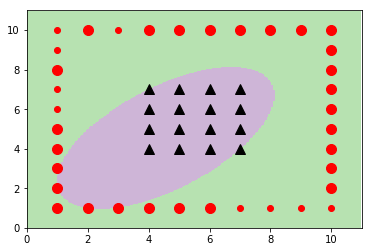

In [3]:
delta = 0.05
xx, yy = np.meshgrid(np.arange(xmin, xmax, delta), np.arange(ymin, ymax, delta))
grid = np.c_[xx.ravel(), yy.ravel()]
gn, gp = grid.shape
Z = np.zeros(gn)
for i in range(gn):
    Z[i] = evaluate(alpha,x,y,grid[i,:])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.PRGn, vmin=-3, vmax=3)

# Identify the support vectors
sv = (alpha > 0)
notsv = np.logical_not(sv)

# Plot also the training points
plt.plot(x[(y==1)*notsv,0], x[(y==1)*notsv,1], 'ro')
plt.plot(x[(y==1)*sv,0], x[(y==1)*sv,1], 'ro', markersize=10)
plt.plot(x[(y==-1)*notsv,0], x[(y==-1)*notsv,1], 'k^')
plt.plot(x[(y==-1)*sv,0], x[(y==-1)*sv,1], 'k^', markersize=10)

plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
plt.show()